# Project: Investigating the TMDB Movie Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMBD movie dataset is originally sourced from Kaggle (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) and collected from The Movie Database (TMDb). The dataset consists of 10,866 movie instances and contains 21 attributes including the movie id, budget, revenue, title, cast, vote average of the movie etc. It contains some missing values and 1 duplicate feature, hence would require data cleaning to fix missing data, duplicates, e.t.c in the data.

The following questions would be addressed and analyzed. They include;
* What company has the highest number of movie production between 1960 and 2015?
* What is the most common genre type represented in the released movies? 
* Who are the leading movie directors in the movie industry between 1960 and 2015?
* What year had the highest number of movies released between 1960 and 2015?
* What trend does the movie runtime display on an average from past years?

###### Load the import statements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import chain
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

###### Loading the CSV file using pandas and checking the first 5 rows of the dataset using the .head(5) function.

In [2]:
path_to_data = "/home/grace/Desktop/Udacity_Intoduction_to_Data_Analysis/tmdb-movies.csv"
read_data = pd.read_csv(path_to_data)
read_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


###### Displaying the last 5 rows of the dataset using the .tail(5) function.

In [3]:
read_data.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


###### Checking the statistical summary of the provided dataset.

In [4]:
read_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###### Getting some more information about the dataset such as the number of non-null values per column and its respective datatype.

In [5]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### Checking the number of rows and columns in the provided dataset.

The dataset contains 10,866 movie instances and 21 attributes.


In [6]:
read_data.shape

(10866, 21)

###### Checking the sum of null values per column in the provided dataset.

In [7]:
read_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### Get only the columns with null values.

In [8]:
null_data_sum = read_data.isna().sum()
null_data_sum [null_data_sum >0].sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
dtype: int64

###### Plotting the percentage of missing/null values from the provided dataset.

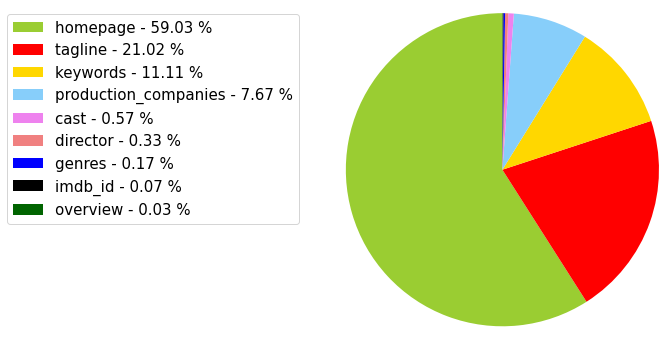

In [9]:
plt.figure(figsize=(16,6))

# Calculate the sum of null values for each column in the dataframe.
x = read_data.isna().sum()
# Get only the columns with null values
x = x[x >0].sort_values(ascending=False)
label=x.index
colors = ['yellowgreen','red','gold','lightskyblue','Violet','lightcoral','blue','black', 'darkgreen']#,'yellow','grey','violet','magenta','cyan'
percent = 100.*x/x.sum()

patches, texts = plt.pie(x, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, x),
                                          key=lambda label: label[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=15)

# Reference for the plot specification [1]:
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

###### Note:
After identifying and plotting the columns of the provided data with null values, it is observed that the homepage column has the highest percentage of missing data. Other columns with missing data includes; 'tagline',  'keywords', 'production_companies','cast', 'director','genres', 'imdb_id', 'overview' in respective order.

### Data Cleaning

###### Dropping unimportant columns from the provided data and assigning a new variable 'new_data' with important parameters for further analysis.

Based on the research questions outlined in the introduction section, only the important columns that will be used for analysis with be extracted. The rest of the coulumns not being used will be dropped. This also creates a cleaner dataframe with the important parameters.

In [10]:
new_data = read_data.drop(['imdb_id', 'popularity', 'budget', 'revenue',\
                           'cast', 'homepage', 'tagline', 'keywords', 'overview',\
                           'release_date', 'vote_count','budget_adj','revenue_adj'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   original_title        10866 non-null  object 
 2   director              10822 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 679.2+ KB


###### Removing Null values from the dataframe.

In [11]:
new_data = new_data.dropna(axis=0, how='any')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   original_title        9807 non-null   object 
 2   director              9807 non-null   object 
 3   runtime               9807 non-null   int64  
 4   genres                9807 non-null   object 
 5   production_companies  9807 non-null   object 
 6   vote_average          9807 non-null   float64
 7   release_year          9807 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 689.6+ KB


###### Checking for duplicate entries. 
There is only one duplicated row and it will have to be dropped.

In [12]:
new_data.duplicated().sum()
new_data.loc[new_data.duplicated(), :]

,id,original_title,director,runtime,genres,production_companies,vote_average,release_year
2090,42194,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010


###### Dropping duplicate data.

In [13]:
new_data.drop_duplicates(inplace=True)

###### Checking the shape of the data after dropping duplicates and null values.

In [14]:
new_data.shape

(9806, 8)

###### Checking the statistical summary of the dataset after dropping duplicates and null values.

In [15]:
new_data.describe()

,id,runtime,vote_average,release_year
count,9806.000000,9806.000000,9806.000000,9806.000000
mean,63287.653783,102.744340,5.966459,2000.890271
std,90808.473021,28.134561,0.914291,13.032372
min,5.000000,0.000000,1.500000,1960.000000
25%,10247.500000,90.000000,5.400000,1994.000000
50%,18725.500000,100.000000,6.000000,2005.000000
75%,70586.750000,112.000000,6.600000,2011.000000
max,417859.000000,877.000000,8.700000,2015.000000


###### Checking more information on the dataset such as the number of non-null values per column and its respective datatype .

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9806 non-null   int64  
 1   original_title        9806 non-null   object 
 2   director              9806 non-null   object 
 3   runtime               9806 non-null   int64  
 4   genres                9806 non-null   object 
 5   production_companies  9806 non-null   object 
 6   vote_average          9806 non-null   float64
 7   release_year          9806 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 689.5+ KB


###### Displaying the first 5 rows of the dataset using the .head(5) function.

In [17]:
new_data.head(5)

,id,original_title,director,runtime,genres,production_companies,vote_average,release_year
0,135397,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,262500,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,140607,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,168259,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


###### Displaying the last 5 rows of the dataset using the .tail(5) function.

In [18]:
new_data.tail(5)

,id,original_title,director,runtime,genres,production_companies,vote_average,release_year
10861,21,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,7.4,1966
10862,20379,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966
10863,39768,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,6.5,1966
10864,21449,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,5.4,1966
10865,22293,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,1.5,1966


###### Creating a function to remove tags from the text data and converting all text to lowercase.

In [19]:
def remove_tags(text):
    '''Using a function to remove tags from the text data and make all text in lowercase.'''
    text = text.lower()
    clean = re.sub(r'[-\(\)\"#\/@;:<>\{\}\-=~\.\?\,\!\+\']', '', text)
    return clean

###### Applying the remove_tags function to columns with text data on the 'new_data' dataframe.

###### Note:
* The remove_tag function is applied to the columns with text data as a pre-processing step. 

* The text are converted to lowercase to avoid errors or omission that could occur from case sensitive text. For example; Action and action could be interpreted as 2 different genres meanwhile they are the same.

* On the other hand, the tags are removed to focus only on the important text information. Please note that the tag ('|') is not removed on purposed so as to easily split and separate one information from the other e.g. seprating the various text ('adventure', 'science fiction','thriller') from the string 'adventure|science fiction|thriller'.

In [20]:
remove_tags_columns=['original_title','director', 'genres', 'production_companies']
for i in remove_tags_columns:
    new_data[i] = new_data[i].apply(remove_tags)

###### Displaying the first 10 rows of the dataset using the .head(10) function after applying the remove_tags function to select columns.

In [21]:
new_data.head(10)

,id,original_title,director,runtime,genres,production_companies,vote_average,release_year
0,135397,jurassic world,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,6.5,2015
1,76341,mad max fury road,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,7.1,2015
2,262500,insurgent,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,6.3,2015
3,140607,star wars the force awakens,jj abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,7.5,2015
4,168259,furious 7,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,7.3,2015
5,281957,the revenant,alejandro gonzã¡lez iã±ã¡rritu,156,western|drama|adventure|thriller,regency enterprises|appian way|catchplay|anony...,7.2,2015
6,87101,terminator genisys,alan taylor,125,science fiction|action|thriller|adventure,paramount pictures|skydance productions,5.8,2015
7,286217,the martian,ridley scott,141,drama|adventure|science fiction,twentieth century fox film corporation|scott f...,7.6,2015
8,211672,minions,kyle balda|pierre coffin,91,family|animation|adventure|comedy,universal pictures|illumination entertainment,6.5,2015
9,150540,inside out,pete docter,94,comedy|animation|family,walt disney pictures|pixar animation studios|w...,8.0,2015


###### Displaying the last 10 rows of the dataset using the .tail(10) function after applying the remove_tags function.

In [22]:
new_data.tail(10)

,id,original_title,director,runtime,genres,production_companies,vote_average,release_year
10856,20277,the ugly dachshund,norman tokar,93,comedy|drama|family,walt disney pictures,5.7,1966
10857,5921,nevada smith,henry hathaway,128,action|western,paramount pictures|solar productions|embassy p...,5.9,1966
10858,31918,the russians are coming the russians are coming,norman jewison,126,comedy|war,the mirisch corporation,5.5,1966
10859,20620,seconds,john frankenheimer,100,mystery|science fiction|thriller|drama,gibraltar productions|joel productions|john fr...,6.6,1966
10860,5060,carry on screaming,gerald thomas,87,comedy,peter rogers productions|angloamalgamated film...,7.0,1966
10861,21,the endless summer,bruce brown,95,documentary,bruce brown films,7.4,1966
10862,20379,grand prix,john frankenheimer,176,action|adventure|drama,cherokee productions|joel productions|douglas ...,5.7,1966
10863,39768,beregis avtomobilya,eldar ryazanov,94,mystery|comedy,mosfilm,6.5,1966
10864,21449,whats up tiger lily,woody allen,80,action|comedy,benedict pictures corp,5.4,1966
10865,22293,manos the hands of fate,harold p warren,74,horror,normiris,1.5,1966


###### Cross-checking the cleaned data again for any duplicates.

In [23]:
new_data.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


###### Displaying the histogram of the cleaned data.

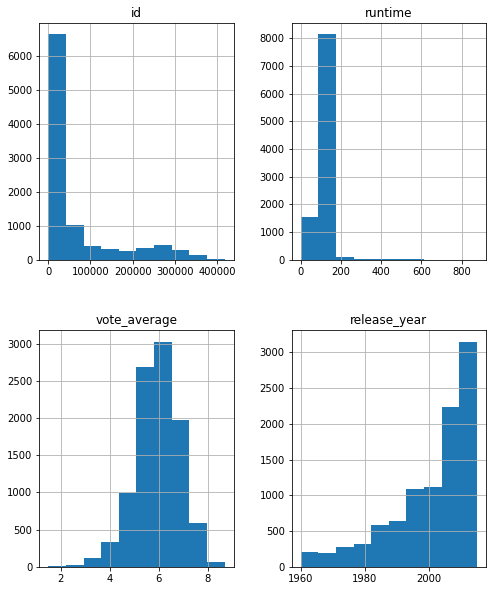

In [24]:
new_data.hist(figsize=(8,10));

###### Note:
A histogram displays how often a particular value falls within a particular bin [2].

Based on the histogram of the cleaned data displayed above, it is observed that;
* The 'id' and 'runtime' column has a left-skewed or negative-skewed distribution, hence the mean is preferred as a measure of central tendency. Both columns are also unimodal as they only have one peak(or mode).

* The 'vote_average' column appears to fall between the symmetric distribution and right-skewed disribution. It is also unimodal (that is, it has one mode/peak).

* The 'release_year' column has a right-skewed or positive-skewed distribution, hence the median is preferred as a measure of central tendency when compared to the mean which is more sensitive to higher values. It is unimodal as well. 

In [25]:
# Plot functions used for visualization.

def plot_size_and_weight(plot_graph, bold_font=False):
    # To update/change the fontsize of the plot.
    for plot_label in (plot_graph.get_xticklabels() + plot_graph.get_yticklabels()):
        plot_label.set_fontsize(20)
        if bold_font==True:
            plot_label.set_fontweight('bold')
        
def axis_and_titles(plot_title, xaxis_label, yaxis_label, set_grid=False):
    # Setting the title of the figure.
    plt.title(str(plot_title),fontsize = 20)
    # Setting the x-label and y-label of the plot.
    plt.xlabel(str(xaxis_label),fontsize = 18)
    plt.ylabel(str(yaxis_label),fontsize = 18)
    if set_grid==True:
        sns.set_style("whitegrid")

###  Question 1: What company has the highest number of movie production ? 

###### Getting the list of all production companies who have released a movie between 1960 and 2015.

In [26]:
company_list = list(chain.from_iterable([company.split("|") for company in new_data['production_companies'].values]))
pd.Series(company_list).value_counts().sort_values(ascending=False)

universal pictures                        522
warner bros                               509
paramount pictures                        431
twentieth century fox film corporation    282
columbia pictures                         272
                                         ... 
international cine productions              1
golden harvest pictures                     1
oak productions                             1
spellinggoldberg productions                1
normiris                                    1
Length: 7831, dtype: int64

###### Plot of the Top 25 Companies With The Highest Movie Production.

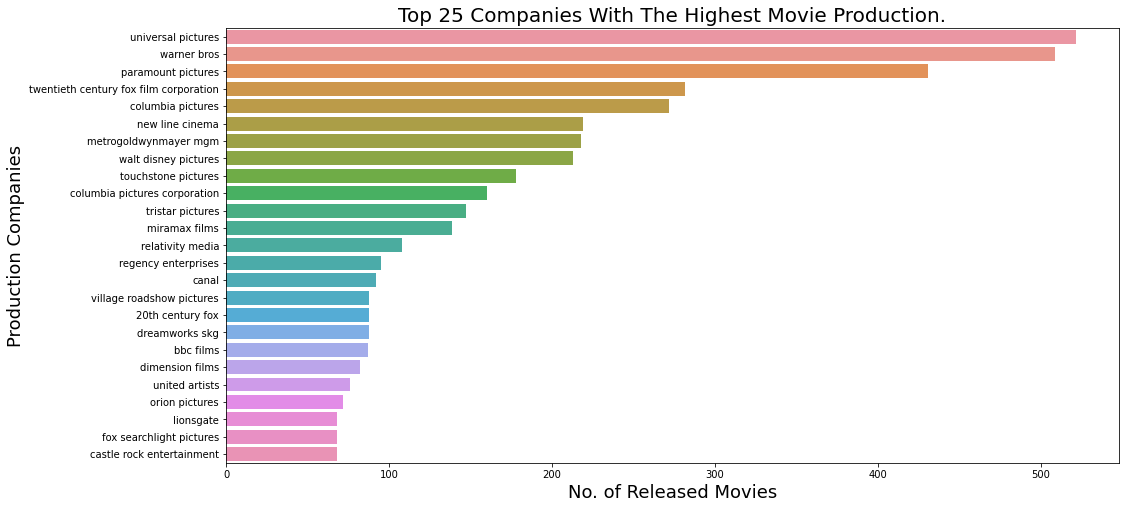

In [27]:
company_list_s = pd.Series(company_list).value_counts().sort_values(ascending=False).iloc[:25]
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=company_list_s, y=company_list_s.index, orient='h')
axis_and_titles(plot_title='Top 25 Companies With The Highest Movie Production.', 
                xaxis_label= 'No. of Released Movies',
                yaxis_label= 'Production Companies',
                set_grid=True)

###### Answer: 
The company with the highest number of movie productions between 1960 and 2015 is 'Universal pictures' with 522 released movies. The second leading company is 'Warner Bros' with 509 movies produced. Finally, the third company is 'Paramount pictures' with 431 released movies. Having 'Universal Pictures' as the company with the highest movie productions could be associated with how long the company has been in existence. The company was formed back in 1912 [3] and as such has released more movies than others. This remark could further be explored and investigated with more data analysis.

###  Question 2: What is the most common genre type represented in the released movies? 

###### Getting the list of all genre types represented in released movies between 1960 and 2015.

In [28]:
genre_list = list(chain.from_iterable([movie_genre.split("|") for movie_genre in new_data['genres'].values]))
# No of genres represented with the number of released movies.
pd.Series(genre_list).value_counts().sort_values(ascending=False)

drama              4369
comedy             3438
thriller           2747
action             2235
romance            1570
horror             1526
adventure          1385
crime              1299
science fiction    1137
family             1103
fantasy             842
mystery             773
animation           637
music               341
documentary         331
history             308
war                 259
western             160
tv movie            132
foreign             120
dtype: int64

###### Plot of the Genre Type Represented With The Number of Released Movies.

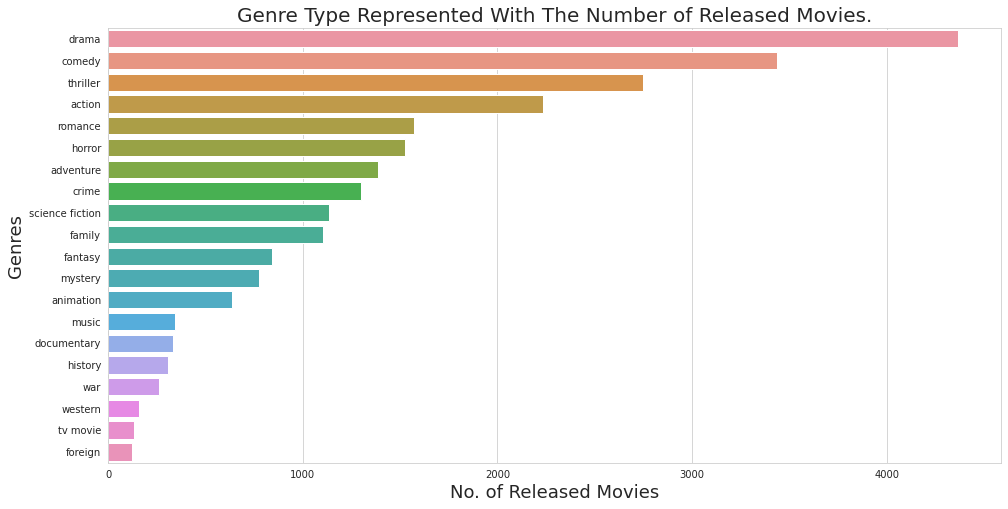

In [29]:
genre_list_s = pd.Series(genre_list).value_counts().sort_values(ascending=False) # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=genre_list_s, y=genre_list_s.index, orient='h')
axis_and_titles(plot_title='Genre Type Represented With The Number of Released Movies.', 
                xaxis_label= 'No. of Released Movies',
                yaxis_label= 'Genres',
                set_grid=True)

###### Answer:
The top 3 genres common among the released movies between 1960 and 2015 are 'Drama', 'Comedy', and 'Thriller' respectively. The most common genre type as displayed in the figure above is 'Drama'.

### Question 3: Who are the leading movie directors in the movie industry between 1960 and 2015?

###### Getting the list of all movie directors who have produced a movie between 1960 and 2015.

In [30]:
director_list = list(chain.from_iterable([director.split("|") for director in new_data['director'].values]))
pd.Series(director_list).value_counts().sort_values(ascending=False)

woody allen          43
clint eastwood       34
steven spielberg     30
martin scorsese      28
steven soderbergh    23
                     ..
byron haskin          1
paul henreid          1
jules dassin          1
nathan h juran        1
harold p warren       1
Length: 4776, dtype: int64

###### Plot of the Top 25 Movie Directors Vs. Number of Released Movies.

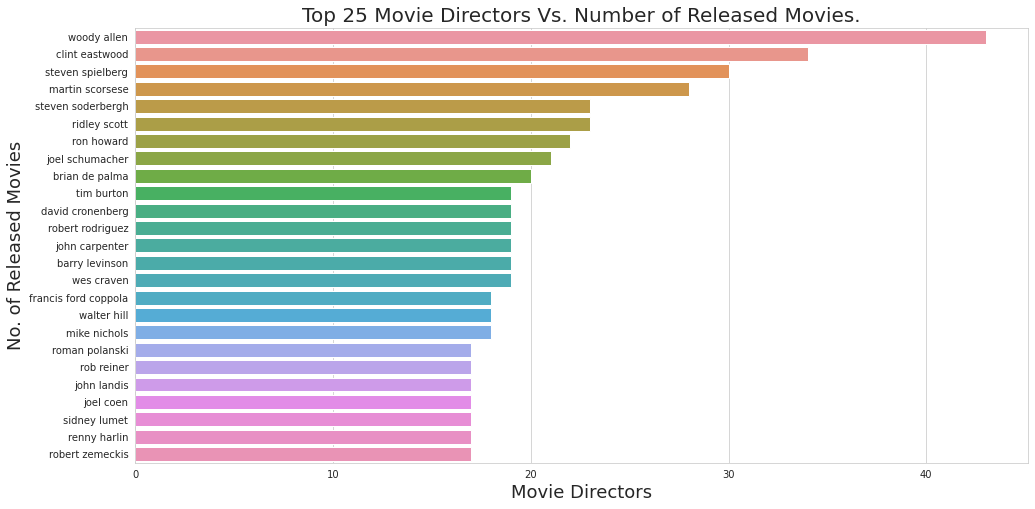

In [31]:
director_s = pd.Series(director_list).value_counts().sort_values(ascending=False).iloc[:25] # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=director_s, y=director_s.index, orient='h')
axis_and_titles(plot_title='Top 25 Movie Directors Vs. Number of Released Movies.', 
                xaxis_label= 'Movie Directors',
                yaxis_label= 'No. of Released Movies',
                set_grid=True)

###### Answer:
The top 3 leading movie directors in the movie industry between 1960 and 2015 are 'Woody Allen', 'Clint Eastwood', 'Steven Spielberg' respectively.

### Question 4: What year had the highest number of movies released between 1960 and 2015?

###### Getting the value count of the number of movies released between 1960 and 2015.

In [32]:
new_data.release_year.value_counts().sort_values(ascending=False)

2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
2005    324
2003    254
2004    253
2002    243
1999    212
2001    212
2000    197
1996    196
1998    191
1997    180
1994    174
1993    172
1995    170
1988    133
1989    129
1992    127
1990    126
1991    125
1987    114
1986    110
1985    106
1984    100
1982     80
1981     78
1983     77
1980     73
1978     61
1979     56
1977     55
1973     55
1971     55
1976     46
1966     44
1974     44
1975     42
1964     41
1970     40
1967     37
1972     37
1968     37
1963     34
1965     34
1960     32
1961     30
1962     30
1969     29
Name: release_year, dtype: int64

###### Getting the statistical summary of the value count of movies released between 1960 and 2015.

In [33]:
new_data.release_year.value_counts().describe()

count     56.000000
mean     175.107143
std      163.631257
min       29.000000
25%       45.500000
50%      119.500000
75%      219.750000
max      638.000000
Name: release_year, dtype: float64

###### Getting the statistical summary of movies released between 1960 and 2015.

In [34]:
new_data.release_year.describe()

count    9806.000000
mean     2000.890271
std        13.032372
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

###### Plot of the Number of Movies Released Per Year.

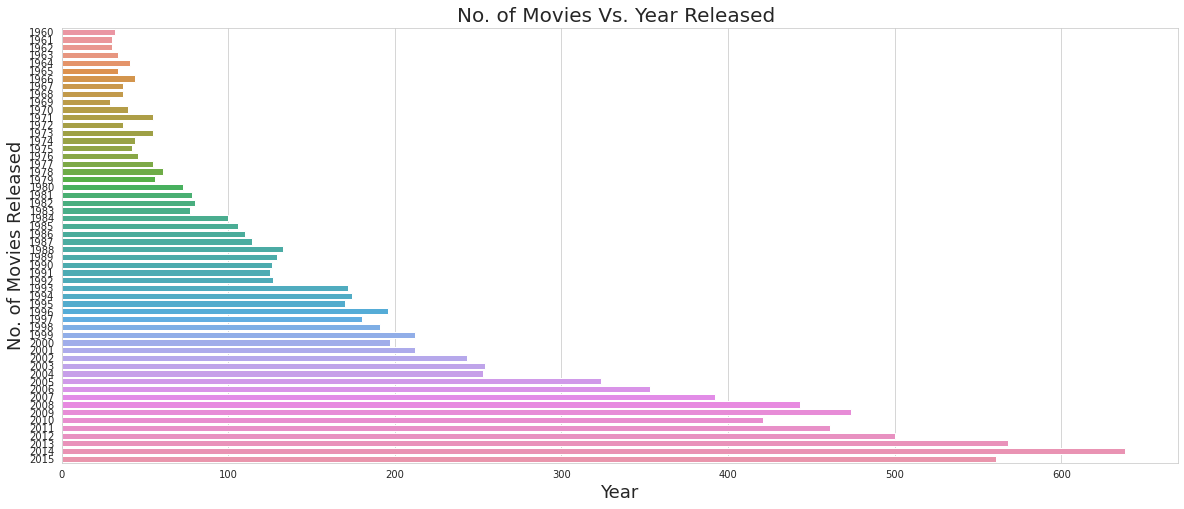

In [35]:
plot_release_year = new_data.release_year.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=plot_release_year, y=plot_release_year.index, orient='h')
axis_and_titles(plot_title='No. of Movies Vs. Year Released ', 
                xaxis_label= 'Year',
                yaxis_label= 'No. of Movies Released',
                set_grid=True)

###### Answer:
Between 1960 and 2015, the highest and lowest number of movies released took place in year 2014 and 1969 respectively. Overall, the number of movies released varies each year.

### Question 5: What trend does the movie runtime display on an average from past years?

###### Grouping the release year by the average runtime of the movies released between 1960 and 2015.

In [36]:
new_data.groupby('release_year')['runtime'].mean().sort_values(ascending=False)

release_year
1962    125.833333
1961    119.866667
1965    119.294118
1970    113.075000
1979    112.625000
1978    111.573770
1963    111.323529
1964    111.195122
1960    110.656250
1968    110.540541
1969    110.310345
1976    109.956522
1985    109.433962
2001    108.990566
1974    108.659091
1966    108.590909
1980    108.424658
1995    108.335294
1977    108.327273
1992    108.086614
1994    107.850575
1993    107.744186
1971    107.727273
1975    107.714286
1999    107.650943
1997    107.594444
1967    106.567568
2002    106.407407
1996    106.336735
1990    105.880952
1991    105.768000
1989    105.457364
1981    105.064103
1998    104.774869
1983    104.389610
2000    104.258883
2005    104.160494
1982    104.037500
1984    103.840000
2004    103.632411
1973    103.527273
1988    103.293233
1972    103.027027
1987    101.456140
1986    101.254545
2006    101.195467
2007    101.137755
2003    100.818898
2008    100.273138
2010     99.600950
2014     99.106583
2009     98.810127

###### Plot of the Average Movie Runtime Vs. Movie Release Year.

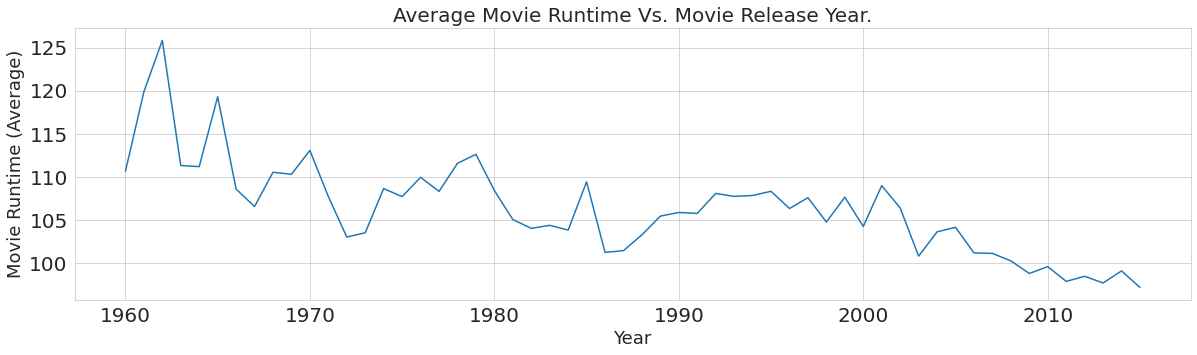

In [37]:
plt.figure(figsize=(20, 5))
plot_release_runtime = new_data.groupby('release_year')['runtime'].mean().plot(kind='line')
axis_and_titles(plot_title='Average Movie Runtime Vs. Movie Release Year.', 
                xaxis_label='Year',
                yaxis_label='Movie Runtime (Average)',
                set_grid=True)
plot_size_and_weight(plot_release_runtime)

###### Answer:
Between 1960 and 2015, the highest movie runtime is displayed to have occured in the year 1962. On the other hand, the lowest runtime on an average is recorded in the 2015. Collectively, the plot above displays that the average movie runtime has decreased over the years.

<a id='conclusions'></a>
## Conclusions


In conclusion, the following findings were observed and deduced as follows;

* The top 3 companies with the highest movie productions between the year 1960 and 2015 are 'Universal pictures', 'Warner Bros', and 'Paramount pictures' respectively.

* The top 3 genres types represented in the movies released between 1960 and 2015 are 'Drama', 'Comedy', and 'Thriller' respectively.

* The top 3 leading movie directors in the movie industry between 1960 and 2015 are 'Woody Allen', 'Clint Eastwood', 'Steven Spielberg' respectively.

* The highest and lowest number of movies released between 1960 and 2015 occured in year 2014 and 1969 respectively. Overall, the number of movies released per year really varies.

* Finally, 1960 and 2015, the highest movie runtime is displayed to have occured in the year 1962. On the other hand, the lowest runtime on an average is recorded in the 2015. Collectively, the plot above displays that the average movie runtime has decreased over the years.


## Limitation
A major limitation during data exploration is the delay in plotting a figure using matplotlib as the data to be plotted increases. Oftentime, the figure could also be congested when all the data to be plotted are alot. To minimize this, as much as possible, the top features were plotted and observed e.g. Top 25 data etc. 

## References
[1] https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

[2] https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1#

[3] https://www.britannica.com/topic/Universal-Studios